<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/16_Dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dates

## Converting Seperate Columns into Datetime

I gathered the folloiwng dataset from [this paper](https://www.sciencedirect.com/science/article/pii/S2352340918315191).  It looks at actual hotel stays and reservations.  It is interesting because it has dates in several formats.

In [2]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/H1.csv')

df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


In [3]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

We can see nothing has been interpreted as a date yet!  Let's grab the low hanging fruit and convert the *ReservationStatusDate* into datetime.  I'll have to give it the correct format of the date.  In this case it is in the Month/Day/Year.  

In [4]:
pa.to_datetime(df.ReservationStatusDate, format='%m/%d/%Y')

0       2015-07-01
1       2015-07-01
2       2015-07-02
3       2015-07-02
4       2015-07-03
           ...    
40055   2017-09-10
40056   2017-09-10
40057   2017-09-12
40058   2017-09-14
40059   2017-09-14
Name: ReservationStatusDate, Length: 40060, dtype: datetime64[ns]

I'll add that to the dataframe converting it's current column.

In [13]:
df.ReservationStatusDate = pa.to_datetime(df.ReservationStatusDate, format='%m/%d/%Y')

If I'd like to do is get the Arrival Date into a date format.  To do that I'll first convert the month into a numeric using a dictionary.

In [7]:
df.ArrivalDateMonth.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [8]:
monthConvert = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

In [9]:
df.ArrivalDateMonth.apply(lambda s: monthConvert[s])

0        7
1        7
2        7
3        7
4        7
        ..
40055    8
40056    8
40057    8
40058    8
40059    8
Name: ArrivalDateMonth, Length: 40060, dtype: int64

In [14]:
df['ArrivalDate'] = pa.to_datetime(dict(year = df.ArrivalDateYear, month = df.ArrivalDateMonth.apply(lambda s: monthConvert[s]), day = df.ArrivalDateDayOfMonth))

df.dtypes

IsCanceled                              int64
LeadTime                                int64
ArrivalDateYear                         int64
ArrivalDateMonth                       object
ArrivalDateWeekNumber                   int64
ArrivalDateDayOfMonth                   int64
StaysInWeekendNights                    int64
StaysInWeekNights                       int64
Adults                                  int64
Children                                int64
Babies                                  int64
Meal                                   object
Country                                object
MarketSegment                          object
DistributionChannel                    object
IsRepeatedGuest                         int64
PreviousCancellations                   int64
PreviousBookingsNotCanceled             int64
ReservedRoomType                       object
AssignedRoomType                       object
BookingChanges                          int64
DepositType                       

I am curious if these two dates have any differences...

In [19]:
differenceInDates =  df.ArrivalDate -df.ReservationStatusDate

differenceInDates.describe()

count                         40060
mean     18 days 01:33:23.275087369
std      54 days 20:29:21.893473870
min              -69 days +00:00:00
25%               -5 days +00:00:00
50%               -2 days +00:00:00
75%                 3 days 00:00:00
max               411 days 00:00:00
dtype: object

We see that on average people make their reservation about 18 days ahead of time and some more than a year!  Not so sure what is going on with all the negative times...

If graphed this in terms of days.  Of course there are other options found [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html#datetime-units) 

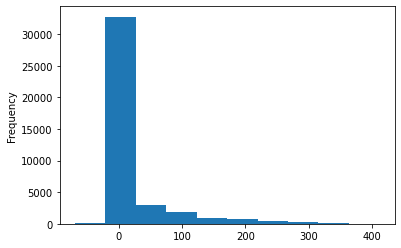

In [25]:
differenceInDates.astype('timedelta64[D]').plot(kind = 'hist')

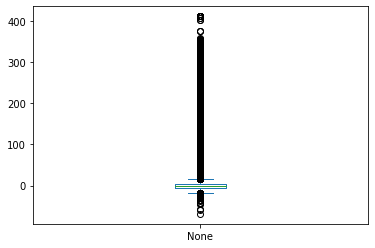

In [27]:
differenceInDates.astype('timedelta64[D]').plot.box()